# Scraped Fixtures API Example

## Run this example in [Colab](https://signaloceansdk.github.io/SignalSDK/examples/jupyter/ScrapedFixturesAPI/Scraped%20Fixtures%20API%20Example/)

Get your personal Signal Ocean API subscription key (acquired [here](https://apis.signalocean.com/profile)) and replace it below:

In [1]:
signal_ocean_api_key = '' # Replace with your subscription key

# Scraped Fixtures API

The goal of Scraped Fixtures API is to collect and return scraped fixtures by the given filters or fixture IDs. This can be done by using the `ScrapedFixturesAPI` class and calling appropriate methods


#### 1. Request by filters

Fixtures can be retrieved for specific filters, by calling the `get_fixtures` method with the following arguments:

#### Required

`vessel_type` The vessel type

_Additionally, at least one of the following is required_

`imos` List of IMOs

`received_date_from` Earliest date the fixture received

`received_date_to` Latest date the fixture received

`updated_date_from` Earliest date the fixture updated

`updated_date_to` Latest date the fixture updated

> Mixing received and updated dates is not allowed

> It's highly recommended to use UTC  dates, since this is the internally used format


#### 2. Request by fixture IDs

Fixtures can be retrieved for specific fixture IDs, by calling the `get_fixtures_by_fixture_ids` method with the following argument:

#### Required

`fixture_ids` A list of fixture ids to retrieve

### Additional optional arguments

Both methods, also accept the following optional arguments:

`include_details` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
parsed_part_id, line_from, line_to, in_line_order, source
```

`include_scraped_fields` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
scraped_vessel_name, scraped_deadweight, scraped_year_built, scraped_laycan, scraped_load, scraped_load2, scraped_discharge, scraped_discharge_options, scraped_discharge2, scraped_charterer, scraped_cargo_type, scraped_quantity, scraped_rate, scraped_rate_options, scraped_delivery_date, scraped_delivery, scraped_redelivery_from, scraped_redelivery_to
```

`include_vessel_details` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
vessel_name, deadweight, year_built, liquid_capacity, vessel_type_id, vessel_type, vessel_class, commercial_operator_id, commercial_operator
```

`include_labels` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
load_name, load_taxonomy, load_name2, load_taxonomy2, discharge_name, discharge_taxonomy, discharge_name2, discharge_taxonomy2, charterer, cargo_type, cargo_group, open_geo_name, open_taxonomy, delivery_name, delivery_taxonomy, redelivery_from_name, redelivery_from_taxonomy, redelivery_to_name, redelivery_to_taxonomy, charter_type, fixture_status
```

`include_content` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
content
```

`include_sender` If this field is `True` the following columns will be included in the response (otherwise they will be `None`): 
```
sender
```

`include_debug_info` If this field is `True` the following columns will be included in the response (otherwise they will be `None`):
```
is_private, is_invalidated, is_partial
```

> Default value is `True` for the arguments described above 

## Installation

To install _Signal Ocean SDK_, simply run the following command

In [2]:
%%capture
%pip install signal-ocean

## Quickstart

Import `signal-ocean` and other modules required for this demo

In [3]:
from signal_ocean import Connection
from signal_ocean.scraped_fixtures import ScrapedFixturesAPI

from datetime import datetime, timedelta
import pandas as pd
import plotly.graph_objects as go

Create a new instance of the `ScrapedFixturesAPI` class

In [4]:
connection = Connection(signal_ocean_api_key)
api = ScrapedFixturesAPI(connection)

Now you are ready to retrieve your data

#### Request by date

To get all tanker fixtures received the last twelve hours, you must declare appropriate `vessel_type` and `received_date_from` variables

In [5]:
vessel_type = 1  # Tanker
received_date_from = datetime.utcnow() - timedelta(hours=12)

And then call `get_fixtures` method, as below

In [6]:
scraped_fixtures = api.get_fixtures(
    vessel_type = vessel_type,
    received_date_from = received_date_from,
)

next(iter(scraped_fixtures), None)

ScrapedFixture(fixture_id=94647327, message_id=26188798, parsed_part_id=41634603, line_from=31, line_to=31, in_line_order=1, source='Email', updated_date=datetime.datetime(2022, 8, 1, 4, 12, 36, tzinfo=datetime.timezone.utc), received_date=datetime.datetime(2022, 8, 1, 4, 10, 18, tzinfo=datetime.timezone.utc), is_deleted=False, scraped_vessel_name='thenamaris tbn', scraped_deadweight=None, scraped_year_built=None, imo=None, vessel_name=None, deadweight=None, year_built=None, liquid_capacity=None, vessel_type_id=0, vessel_type=None, vessel_class_id=None, vessel_class=None, commercial_operator_id=None, commercial_operator=None, scraped_laycan='9 aug', laycan_from=datetime.datetime(2022, 8, 9, 0, 0, tzinfo=datetime.timezone.utc), laycan_to=datetime.datetime(2022, 8, 9, 0, 0, tzinfo=datetime.timezone.utc), scraped_load='vysotsk', load_geo_id=3770, load_name='Vysotsk', load_taxonomy_id=2, load_taxonomy='Port', scraped_load2=None, load_geo_id2=None, load_name2=None, load_taxonomy_id2=None, l

For better visualization, it's convenient to insert data into a DataFrame

In [7]:
df = pd.DataFrame(scraped_fixtures)

df.head()

,fixture_id,message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,is_deleted,...,charter_type,fixture_status_id,fixture_status,is_owners_option,is_coa,content,sender,is_private,is_invalidated,is_partial
0,94647327,26188798,41634603,31,31,1.0,Email,2022-08-01 04:12:36+00:00,2022-08-01 04:10:18+00:00,False,...,Voyage,NaN,None,False,False,thenamaris tbn 100 nhc 9 aug vysotsk med-east ...,Raffles Shipbrokers,True,False,False
1,94647328,26188798,41634603,21,21,NaN,Email,2022-08-01 04:12:36+00:00,2022-08-01 04:10:18+00:00,False,...,Voyage,NaN,None,False,False,tbn 80 dpp 10-12 aug malacca spore usd rnr che...,Raffles Shipbrokers,True,False,False
2,94647329,26188798,41634603,31,31,0.0,Email,2022-08-01 04:12:36+00:00,2022-08-01 04:10:18+00:00,False,...,Voyage,NaN,None,False,False,thenamaris tbn 100 nhc 9 aug vysotsk med-east ...,Raffles Shipbrokers,True,False,False
3,94647330,26188798,41634603,19,19,NaN,Email,2022-08-01 04:12:36+00:00,2022-08-01 04:10:18+00:00,False,...,Voyage,NaN,None,False,False,energy commander 25 mfo 7-9 aug mangalore spor...,Raffles Shipbrokers,True,False,False
4,94647331,26188798,41634603,22,22,NaN,Email,2022-08-01 04:12:36+00:00,2022-08-01 04:10:18+00:00,False,...,Voyage,NaN,None,False,False,new advance 80 fo 10-14 aug spore hkg+zhoushan...,Raffles Shipbrokers,True,False,False


#### Request by IMOs

To get fixtures for specific vessel(s) by their IMO number(s), you can simple call the `get_fixtures` method for a list of desired IMO(s)

In [8]:
imos = df.imo.dropna().sample(5, replace=True).astype(int).tolist()  # Or add a list of your desired fixture IDs

imos

[9359375, 9514169, 9835848, 9439204, 9731169]

Adding some date argument is always feasible

In [9]:
scraped_fixtures_by_imos = api.get_fixtures(
    vessel_type=vessel_type,
    received_date_from=received_date_from,
    imos=imos,
)

df_by_imos = pd.DataFrame(scraped_fixtures_by_imos)
df_by_imos.head()

,fixture_id,message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,is_deleted,...,charter_type,fixture_status_id,fixture_status,is_owners_option,is_coa,content,sender,is_private,is_invalidated,is_partial
0,94647334,26188798,41634603,25,25,NaN,Email,2022-08-01 04:12:36+00:00,2022-08-01 04:10:18+00:00,False,...,Voyage,NaN,None,False,True,uraga princess 300kb cond 6-8 aug malampaya th...,Raffles Shipbrokers,True,False,False
1,94647343,26188798,41634603,27,27,NaN,Email,2022-08-01 04:12:36+00:00,2022-08-01 04:10:18+00:00,False,...,Voyage,NaN,None,False,False,olympic lady 130 nhc 17 aug zafiro spain ws 13...,Raffles Shipbrokers,True,False,False
2,94647606,26189464,41635093,30,30,NaN,Email,2022-08-01 04:27:46+00:00,2022-08-01 04:25:51+00:00,False,...,Voyage,NaN,None,False,False,olympic lady 17 130 17/08 wafr/ukcm w131.5 rep...,SSY,False,False,False
3,94649325,26192755,41637516,42,42,NaN,Email,2022-08-01 05:40:05+00:00,2022-08-01 05:38:50+00:00,False,...,Voyage,NaN,None,False,False,chevron 58cond malampaya/thai 6-7/aug cvrd by ...,Gregale Shipping,True,False,False
4,94649328,26192755,41637516,25,25,NaN,Email,2022-08-01 05:40:05+00:00,2022-08-01 05:38:50+00:00,False,...,Voyage,NaN,None,False,True,uraga princess 60cond malampaya/thai 06/aug o/...,Gregale Shipping,True,False,False


#### Request by fixutre IDs

In the same manner, to get data for specific fixtures ID(s), you must call the `get_fixtures_by_fixture_ids` method for a list of desired fixture ID(s)

In [10]:
fixture_ids = df.sample(5, replace=True).fixture_id.tolist()  # Or add a list of your desired fixture IDs

fixture_ids

[94649329, 94677752, 94664072, 94650039, 94693814]

Date arguments are not available in `get_fixtures_by_fixture_ids` method

In [11]:
scraped_fixtures_by_ids = api.get_fixtures_by_fixture_ids(
    fixture_ids = fixture_ids,
)

df_by_ids = pd.DataFrame(scraped_fixtures_by_ids)
df_by_ids.head()

,fixture_id,message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,is_deleted,...,charter_type,fixture_status_id,fixture_status,is_owners_option,is_coa,content,sender,is_private,is_invalidated,is_partial
0,94649329,26192755,41637516,13,13,None,Email,2022-08-01 05:40:05+00:00,2022-08-01 05:38:50+00:00,False,...,Voyage,NaN,None,False,False,sienna ex d/d 130nhc meg/usg-east 10/aug $3.7m...,Gregale Shipping,True,False,False
1,94650039,26193567,41638084,98,98,None,Email,2022-08-01 05:54:34+00:00,2022-08-01 05:53:49+00:00,False,...,Voyage,1.0,FullyFixed,False,False,tyrrhenian sea 80000 mt fo pengerang usg 05-07...,ShipLinks,True,False,False
2,94664072,26209817,41650756,78,78,None,Email,2022-08-01 08:46:14+00:00,2022-08-01 08:44:49+00:00,False,...,Voyage,NaN,None,False,False,atlanta spirit 130 29/07 malta/trieste $1.15m ...,Essex Shipping Services,True,False,False
3,94677752,26216951,41656506,74,74,None,Email,2022-08-01 10:30:29+00:00,2022-08-01 10:27:39+00:00,False,...,Voyage,0.0,OnSubs,False,False,bowmore subs handy spore 3/8,BRS Group,True,False,True
4,94693814,26225193,41663828,145,145,None,Email,2022-08-01 13:36:08+00:00,2022-08-01 13:32:54+00:00,False,...,Voyage,0.0,OnSubs,False,False,None,STEEM1960,True,False,True


#### Usage of optional arguments

By default, all fields are returned. This is convenient in many cases, for example to compare scraped and mapped fields

In [12]:
fields_to_display = [
    'scraped_vessel_name',
    'vessel_name',
    'scraped_quantity',
    'quantity',
    'scraped_charterer',
    'charterer',
    'scraped_laycan',
    'laycan_from',
    'laycan_to',
]

df[fields_to_display].head()

,scraped_vessel_name,vessel_name,scraped_quantity,quantity,scraped_charterer,charterer,scraped_laycan,laycan_from,laycan_to
0,thenamaris tbn,None,100,100000.0,litasco,Lukoil,9 aug,2022-08-09 00:00:00+00:00,2022-08-09 00:00:00+00:00
1,tbn,None,80,80000.0,chevron,Chevron,10-12 aug,2022-08-10 00:00:00+00:00,2022-08-12 00:00:00+00:00
2,thenamaris tbn,None,100,100000.0,litasco,Lukoil,9 aug,2022-08-09 00:00:00+00:00,2022-08-09 00:00:00+00:00
3,energy commander,Energy Commander,25,25000.0,bp,BP,7-9 aug,2022-08-07 00:00:00+00:00,2022-08-09 00:00:00+00:00
4,new advance,New Advance,80,80000.0,chimbusco,Chimbusco Pan Nation Petro-Chemical,10-14 aug,2022-08-10 00:00:00+00:00,2022-08-14 00:00:00+00:00


## Examples

Let's start by fetching all tanker fixtures received the last two days

In [13]:
example_vessel_type = 1  # tanker
example_date_from = datetime.utcnow() - timedelta(days=2)

example_scraped_fixtures = api.get_fixtures(
   vessel_type=example_vessel_type,
   received_date_from=example_date_from,
)

#### Exclude deleted scraped fixtures

The `is_deleted` property of a scraped fixture indicates whether it is valid or not. If it is set to `True`, the corresponding `fixture_id` has been replaced by a new one.

For the sake of completeness, we will exclude deleted scraped fixtures in the following examples.

In [14]:
data = pd.DataFrame(example_scraped_fixtures)

data = data[data.is_deleted != True]

data.head()

,fixture_id,message_id,parsed_part_id,line_from,line_to,in_line_order,source,updated_date,received_date,is_deleted,...,charter_type,fixture_status_id,fixture_status,is_owners_option,is_coa,content,sender,is_private,is_invalidated,is_partial
0,94642872,26187056,41633186,59,59,NaN,Email,2022-08-01 03:25:53+00:00,2022-08-01 00:00:00+00:00,False,...,Voyage,0.0,OnSubs,False,False,norient tbn 35 cpp yosu/oz 07-09/08 w440 chevr...,Eastport Maritime,True,False,False
1,94642873,26187056,41633186,58,58,NaN,Email,2022-08-01 03:25:53+00:00,2022-08-01 00:00:00+00:00,False,...,Voyage,0.0,OnSubs,False,False,nave sextans 35 cpp s.korea/oz 11-13/08 w400 v...,Eastport Maritime,True,False,False
2,94642874,26187056,41633186,54,54,NaN,Email,2022-08-01 03:25:53+00:00,2022-08-01 00:00:00+00:00,False,...,Voyage,0.0,OnSubs,False,False,sti aqua 35 jet s.china/hkg 04-06/08 1.38m she...,Eastport Maritime,True,False,False
3,94642875,26187056,41633186,21,21,0.0,Email,2022-08-01 03:25:53+00:00,2022-08-01 00:00:00+00:00,False,...,Voyage,0.0,OnSubs,False,False,fpmc 28 35 ums jubail/uae-pak-suez 11-13/08 78...,Eastport Maritime,True,False,False
4,94642876,26187056,41633186,24,24,NaN,Email,2022-08-01 03:25:53+00:00,2022-08-01 00:00:00+00:00,False,...,Voyage,0.0,OnSubs,False,False,red ruby 35 cpp ruwais/hamriyah 03-05/08 790k ...,Eastport Maritime,True,False,False


#### Top 10 Charterers

In this example, we will find the top 10 Charterers, based on the number of distinct voyages

In [15]:
top_chrtr_ser = data[['charterer', 'imo']].drop_duplicates().charterer.value_counts().head(10)

top_chrtr_df = top_chrtr_ser.to_frame(name='FixtureCount').reset_index().rename(columns={'index': 'Charterer'})

top_chrtr_df

,Charterer,FixtureCount
0,Aramco Trading Company,29
1,Vitol,28
2,Total,26
3,Shell,24
4,Unipec,21
5,BP,19
6,ExxonMobil,19
7,Chevron,15
8,Glencore,14
9,Trafigura,12


And display results in a bar plot

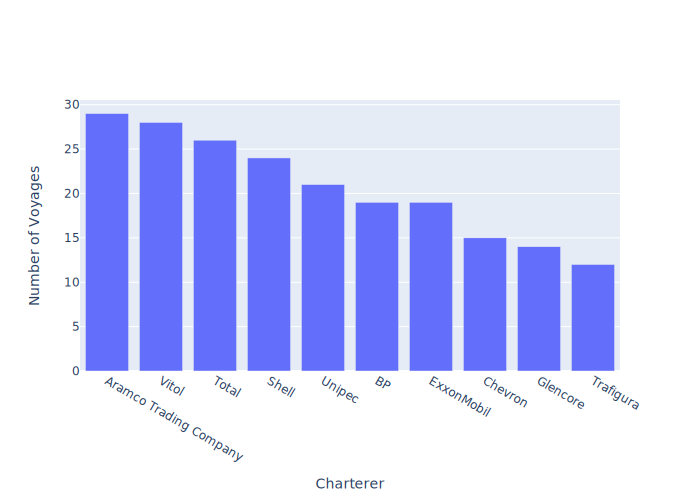

In [16]:
top_chrtr_fig = go.Figure()

bar = go.Bar(
    x=top_chrtr_df.Charterer.tolist(),
    y=top_chrtr_df.FixtureCount.tolist(),
)

top_chrtr_fig.add_trace(bar)
top_chrtr_fig.update_xaxes(title_text="Charterer")
top_chrtr_fig.update_yaxes(title_text="Number of Voyages")
top_chrtr_fig.show()

#### Vessels loading in specific areas

In this example, we will create a visualization, for the number of distinct vessels loading in specific areas per day over the next week

In [17]:
areas = [
    'Arabian Gulf',
    'Continent',
    'US Gulf',
    'Brazil',
    'Korea, Republic of',
]

this_week_days = pd.date_range(start=datetime.utcnow().date(), freq='D', periods=7, tz='UTC')

Create the pivot table

In [18]:
areas_mask = data.load_name.isin(areas) & data.laycan_from.isin(this_week_days)

df_areas = data[areas_mask]

df_pivot = pd.pivot_table(
    df_areas,
    columns='load_name',
    index='laycan_from',
    values='imo',
    aggfunc=pd.Series.nunique,
    fill_value=0,
).reindex(index=this_week_days, fill_value=0).reset_index().rename(columns={'index': 'laycan_from'})

df_pivot

load_name,laycan_from,Arabian Gulf,Brazil,Continent,"Korea, Republic of",US Gulf
0,2022-08-01 00:00:00+00:00,7,1,1,0,7
1,2022-08-02 00:00:00+00:00,3,0,2,2,6
2,2022-08-03 00:00:00+00:00,1,0,2,1,5
3,2022-08-04 00:00:00+00:00,0,0,0,3,8
4,2022-08-05 00:00:00+00:00,4,1,6,5,4
5,2022-08-06 00:00:00+00:00,0,2,3,1,4
6,2022-08-07 00:00:00+00:00,3,0,0,0,4


And display the results as timeseries

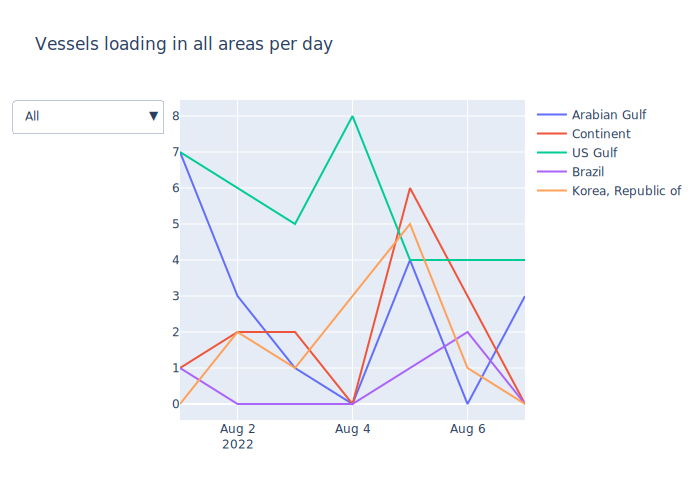

In [19]:
def area_button(area):
    args = [
        {'visible': [i == areas.index(area) for i in range(len(areas))]},
        {
            'title': f'Vessels loading in {area} per day',
            'showlegend': True
        },
    ]
    
    return dict(
        label=area,
        method='update',
        args=args,
    )

title = 'Vessels loading in all areas per day'

areas_fig = go.Figure()

area_buttons = []

for area in areas:
    if area not in df_pivot.columns:
        continue
    area_scatter_plot = go.Scatter(    
        x = df_pivot.laycan_from,
        y = df_pivot[area],
        name=area,
        mode='lines',
    )

    areas_fig.add_trace(area_scatter_plot)
    
    area_buttons.append(area_button(area))
    
buttons = list([
    dict(
        label='All',
        method='update',
        args=[    
            {'visible': [True for _ in range(len(areas))]},
            {
                'title': title,
                'showlegend': True
            }
        ],
    ),
    *area_buttons,
])

areas_fig.update_layout(
    title=title,
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=buttons,
    )]
)

areas_fig.show()

#### Export data to csv

In [20]:
output_path = '' # Change output_path with your path
filename = 'last_two_days_fixtures.csv'
if not data.empty:
    data.to_csv(output_path+filename, index=False)